In [33]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#loading dataset
df=pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [150]:
df.longitude.max()

1.0

In [149]:
#scaling data between 0 to 1
df['longitude']=df['longitude']/(-124.35)
df['latitude']=df['latitude']/41.95
df['housing_median_age']=df['housing_median_age']/52
df['total_rooms']=df['total_rooms']/39320
df['total_bedrooms']=df['total_bedrooms']/6445
df['population']=df['population']/35682
df['households']=df['households']/6082
df['median_income']=df['median_income']/15.0001
df['median_house_value']=df['median_house_value']/500001


In [133]:
df.head()


1.0

In [151]:
#Getting rid of the missing value in the bedrooms columns by using mean
df.fillna(df['total_bedrooms'].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [152]:
#Generating dummies for ocean proximity as we cannot feed string to the system
dummies=pd.get_dummies(df['ocean_proximity'],dtype=int)

In [153]:
#dropping string column and joining the dummies
df.drop(['ocean_proximity'],axis=1,inplace=True)
df=df.join(dummies)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.982951,0.902980,0.788462,0.022380,0.020016,0.009024,0.020717,0.555010,0.905198,0,0,0,1,0
1,0.982871,0.902503,0.403846,0.180544,0.171606,0.067289,0.187110,0.553423,0.716999,0,0,0,1,0
2,0.983032,0.902265,1.000000,0.037309,0.029480,0.013901,0.029102,0.483823,0.704199,0,0,0,1,0
3,0.983112,0.902265,1.000000,0.032401,0.036462,0.015638,0.036008,0.376204,0.682599,0,0,0,1,0
4,0.983112,0.902265,1.000000,0.041378,0.043445,0.015834,0.042585,0.256412,0.684399,0,0,0,1,0


<Axes: >

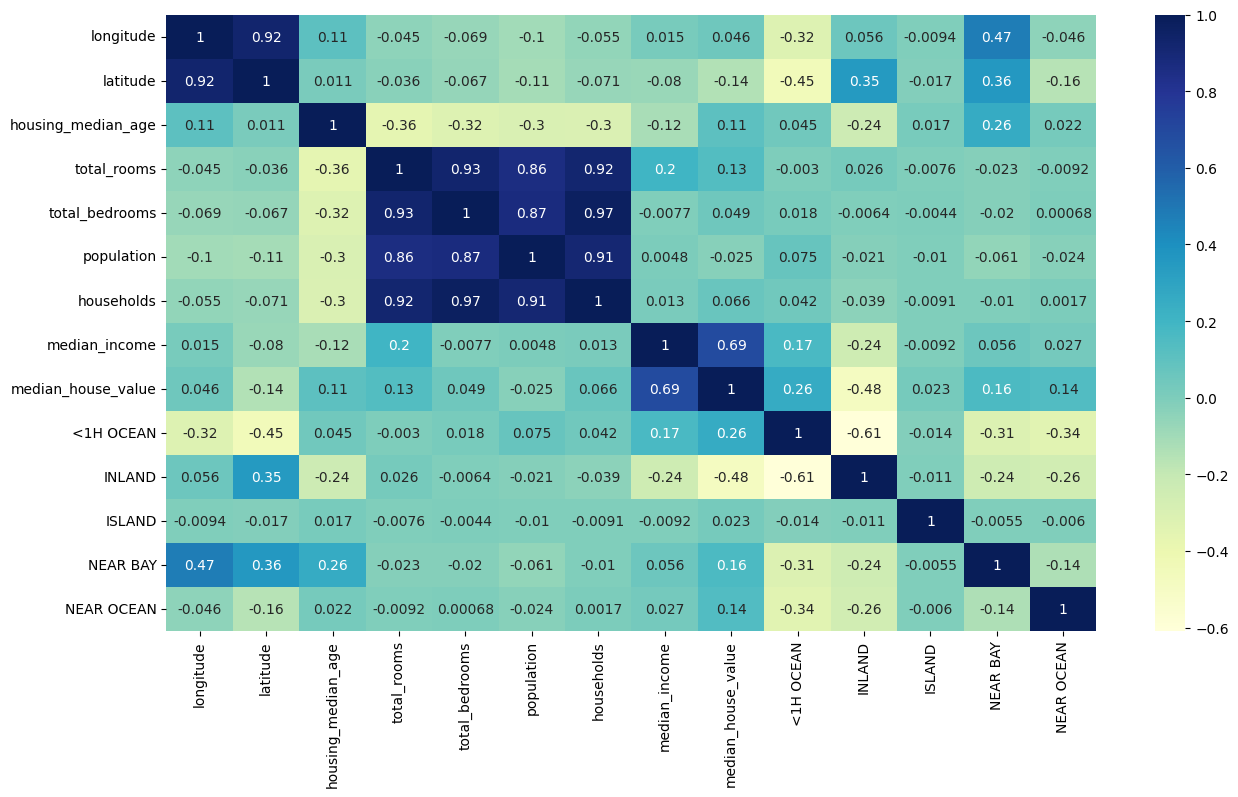

In [154]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

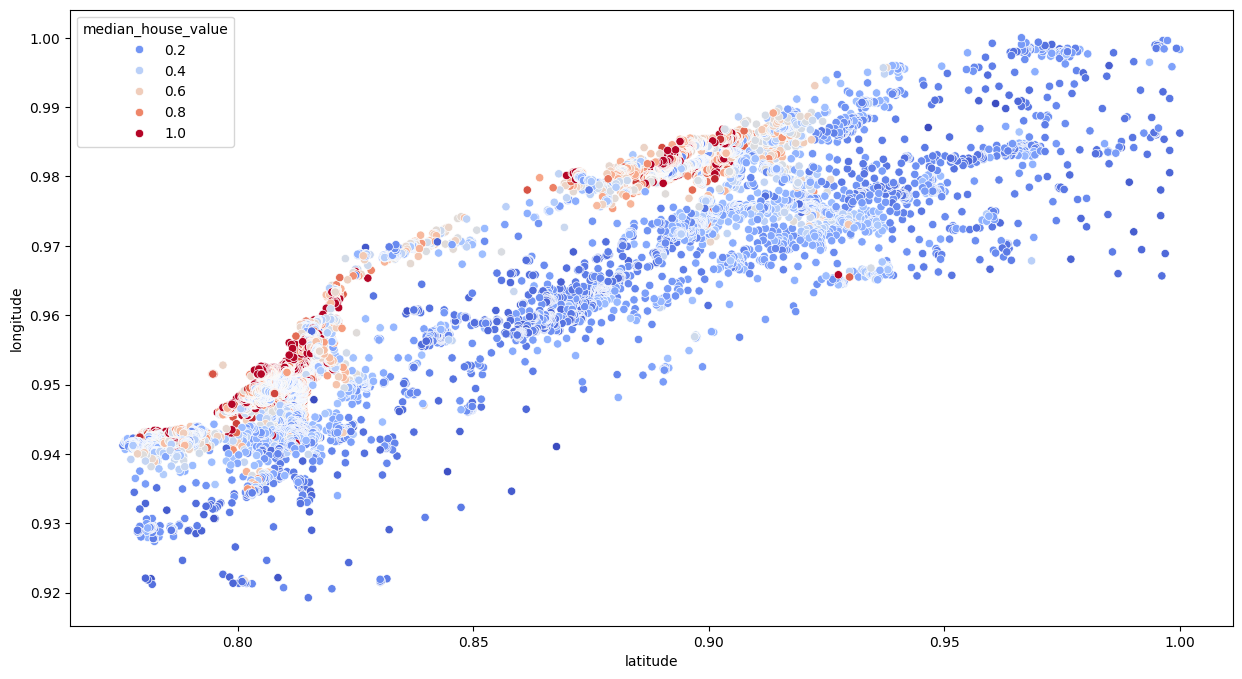

In [155]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='latitude',y='longitude',hue='median_house_value',palette='coolwarm')

In [156]:
#Seperating the target column and independent columns
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [157]:
#Splitting data into train and test set by 80% and 20% ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_test.info()

<class 'pandas.core.series.Series'>
Index: 4128 entries, 1482 to 16199
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
4128 non-null   float64
dtypes: float64(1)
memory usage: 64.5 KB


In [170]:
#model training using Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [171]:
predicted=lr.predict(X_test)
predicted[1]

0.63629150390625

In [172]:
lr.score(X_test,y_test)

0.6529329633857291

In [173]:
#model train using Random forest 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [174]:
rf.score(X_test,y_test)

0.8250960714143907